# V3

# Airbnb NYC Data Analysis

Dataset I used describes the listing activity and metrics in NYC, NY for 2019.

Dataset link > https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

## Problem Statement

Dataset contains close to 49000 records with 16 columns. These columns consist of list title, host id, host name, borough, neighourhood, total reviews, etc. Dataset doesn't contain critical data like do they offer wifi, free meals, how many squarefeet is the property, etc which will affect the pricing of the listing.

Analyze and see what we can learn from this data,

- What can we learn about different hosts and areas?
- What can we learn from predictions? (ex: locations, prices, reviews, etc)
- Which hosts are the busiest and why?
- Is there any noticeable difference of traffic among different areas and what could be the reason for it?

## Analyzing, Visualizing and Cleaning data

Here we analyze data, visualize, see correlations,decide what column do we need and what we don't need, remove unrelated columns, look for the null/na values or wrong data, treat those data, check outliers, treat the outliers and see if it needs more cleaning.

- Basic examination
- What we can learn about location?
- What can we learn about hosts?
- Price distribution
- What key factors drive price the most

## Predictive model

What can we predict? Do we have enough data to build a predictive model.

- Preprocessing
  Preprocessing data to feed the model, split data for training, evaluating and testing
- Model
  Try different regression models and see efficiency.

## Conclusion


# Imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
keras = tf.keras

# Load dataset


In [2]:
df = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1gZub5RlOFHcEuyamGmKdg0SYOIViyspW')

# Analyzing, Visualizing and Cleaning data


## Basic examination


In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.shape

(48895, 16)

There are 48895 rows and 16 columns in dataset.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We can see some columns have null values.


In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


What we can see...

- mean(average) of price values is 152$, min is 0 and max is 10000. while 75% mark of price distribution is 175 there's 10000 priced listing which hint some error in data entry or can be a natural variance. We'll explore this later.
- there are listings that have minimum nights 1250 which can be a error in data.
- number of reviews column data seems ok.
- reviews per month column has missing values.
- some hosts have multiple properties and the host that owns most properties owns 327 properties.
- availability_365 means the number of days the facility is available to be booked in the future 365 days. Some listings have 0 for this and max is 365


<ipython-input-7-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

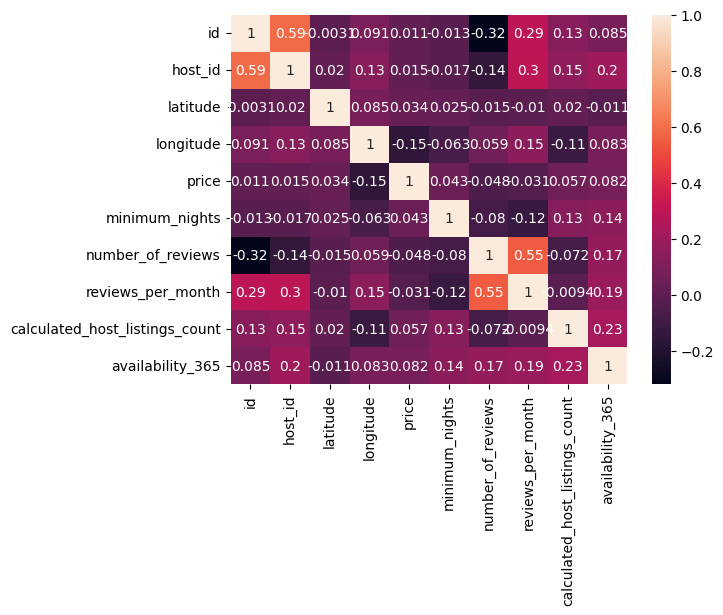

In [7]:
sns.heatmap(df.corr(), annot=True)

I don't see any significant direct corrleations between parameters. We can see reviews_per_month and number_of_reviews have 0.5 correlation. That is straightforward but all of the other values are very low.


One property can have one hostname, one hostname can have multiple properties. Let's see how many properties one hostname own average(mean)


In [8]:
host_names = df['host_name'].unique()
host_name_owned_properties_mean = len(df.index) / len(host_names)
print("there are ", len(host_names), "unique hostnames. One hostname owns averagely ",
      host_name_owned_properties_mean, " properties.")

there are  11453 unique hostnames. One hostname owns averagely  4.2691871125469305  properties.


In [9]:
host_names_value_counts = df['host_name'].value_counts()
host_names_value_counts

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [10]:
len(df['neighbourhood_group'].unique())

5

In [11]:
len(df['neighbourhood'].unique())

221

In [12]:
print("highest priced listing is", df['price'].max(
), "lowest priced listing is", df['price'].min(), "average price of listings", df['price'].mean())

highest priced listing is 10000 lowest priced listing is 0 average price of listings 152.7206871868289


In [16]:
print(df.duplicated().values.any())
print(df.isna().values.any())
print(df.isnull().values.any())

False
True
True


Key points

- there are 11453 unique hostnames. One hostname owns averagely 4.2691871125469305 properties.
- Michael has the most listings and have 417 listings in the dataset.
- There are 5 Boroughs and 221 neighbourhoods.
- highest priced listing is 10000 lowest priced listing is 0 average price of listings 152.7206871868289

About dataset

- There are no duplicated
- wrong or null values present.


That's enough for the basic examination. Let's what can we learn about different hosts and areas?


## what can we learn about different hosts and areas?


Interesting topics for research

- What boroghs or neighbourhoods have most expensive listings?
- What boroghs or neighbourhoods are most busy?
- What host is the most busy and his property distrubution around the NYC.
- What property is the most busy and where it is located.
- What boroghs are the least busy and posible reasons.
- What type of listing are the most and least favorite?


In [17]:
sns.set_theme(style='ticks', palette='pastel')

<Axes: xlabel='neighbourhood_group', ylabel='price'>

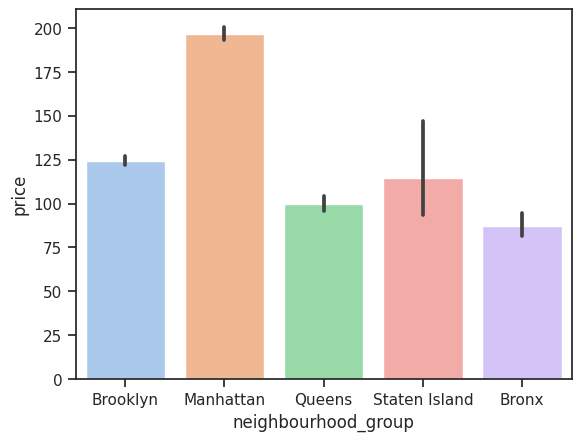

In [18]:
sns.barplot(data=df, x='neighbourhood_group', y='price')

<Axes: xlabel='longitude', ylabel='latitude'>

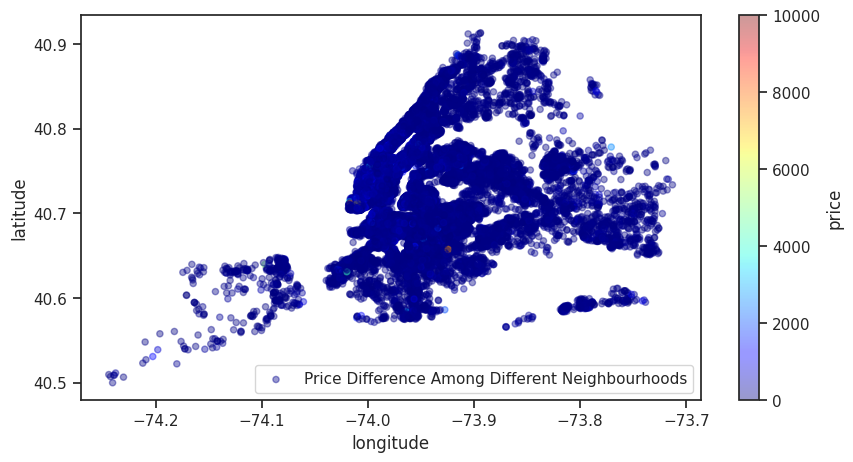

In [22]:
df.plot(kind='scatter', x='longitude', y='latitude', label='Price Difference Among Different Neighbourhoods', c='price',
        cmap='jet', colorbar=True, alpha=0.4, figsize=(10, 5))

Plot is not clear because of outliers in price distribution. for now let's get the listings that are less 400$ and see the plot again.


<Axes: xlabel='longitude', ylabel='latitude'>

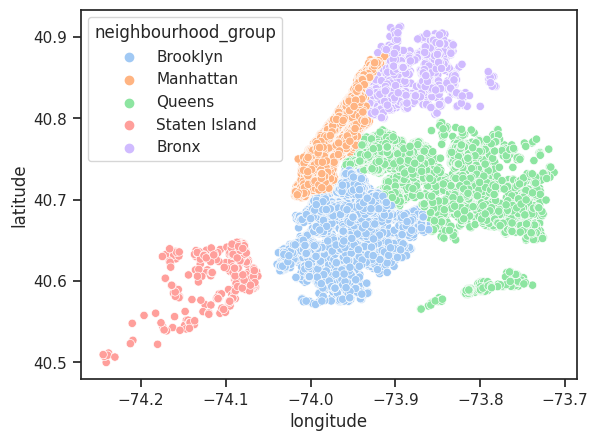

In [48]:
dfc = df.copy()
dfc = dfc[dfc['price'] < 400]
sns.scatterplot(data=dfc, x='longitude', y='latitude',
                hue='neighbourhood_group')

<Axes: xlabel='longitude', ylabel='latitude'>

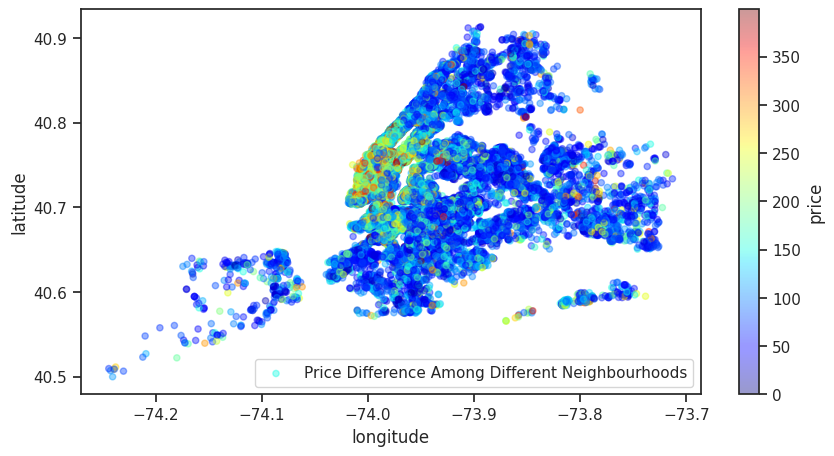

In [26]:
dfc.plot(kind='scatter', x='longitude', y='latitude', label='Price Difference Among Different Neighbourhoods', c='price',
         cmap='jet', colorbar=True, alpha=0.4, figsize=(10, 5))

<Axes: xlabel='longitude', ylabel='latitude'>

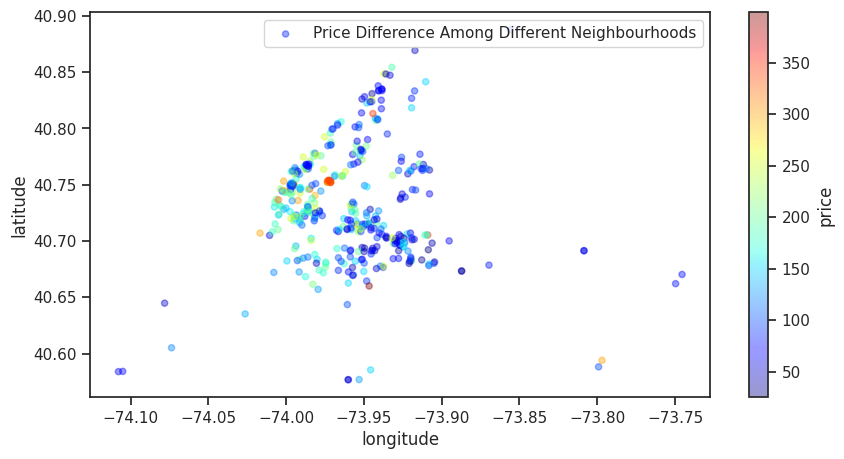

In [28]:
dfc = dfc[dfc['host_name'] == 'Michael']
dfc.plot(kind='scatter', x='longitude', y='latitude', label='Price Difference Among Different Neighbourhoods', c='price',
         cmap='jet', colorbar=True, alpha=0.4, figsize=(10, 5))

<Axes: xlabel='neighbourhood_group', ylabel='price'>

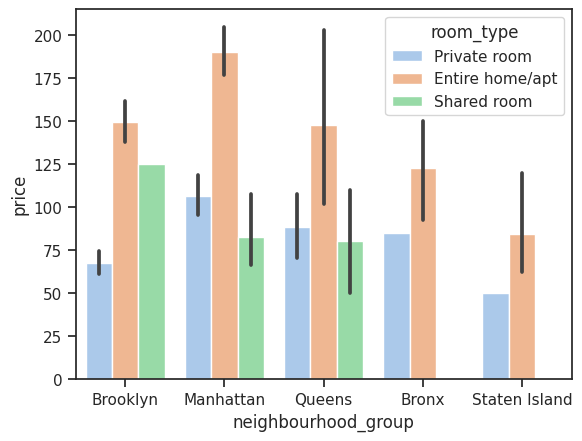

In [29]:
sns.barplot(data=dfc, x='neighbourhood_group', y='price', hue='room_type')

In [34]:
dfcc = dfc.copy()
dfcc = dfcc[dfcc['neighbourhood_group'] == 'Bronx']
dfcc = dfcc[dfcc['room_type'] == "Shared room"]
dfcc.shape

(0, 16)

In [35]:
dfcc = dfc.copy()
dfcc['neighbourhood_group'] == 'Staten Island'
dfcc = dfcc[dfcc['room_type'] == "Shared room"]
dfcc.shape

(14, 16)

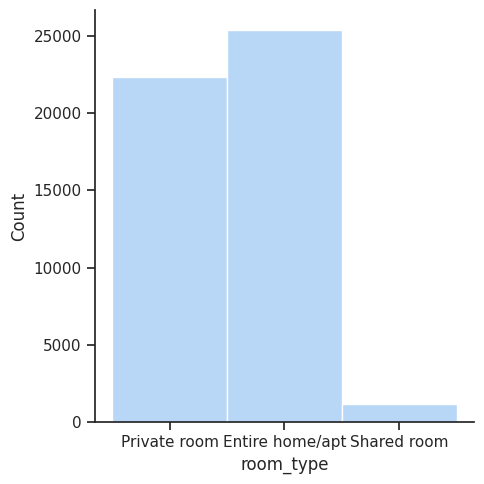

In [41]:
sns.displot(data=df, x='room_type')

<Axes: xlabel='room_type', ylabel='price'>

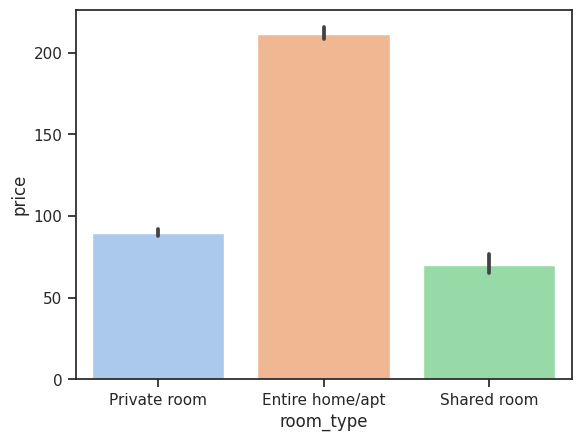

In [50]:
sns.barplot(df, x='room_type', y='price')

In [43]:
dfc = df.copy()
dfc = dfc[dfc['price'] > 400]
dfc.shape

(1763, 16)

In [46]:
room_type_value_counts = dfc['room_type'].value_counts()
room_type_value_counts

Entire home/apt    1535
Private room        216
Shared room          12
Name: room_type, dtype: int64

In [45]:
dfc['price'].mean()

856.2382302892796

<Axes: xlabel='neighbourhood', ylabel='price'>

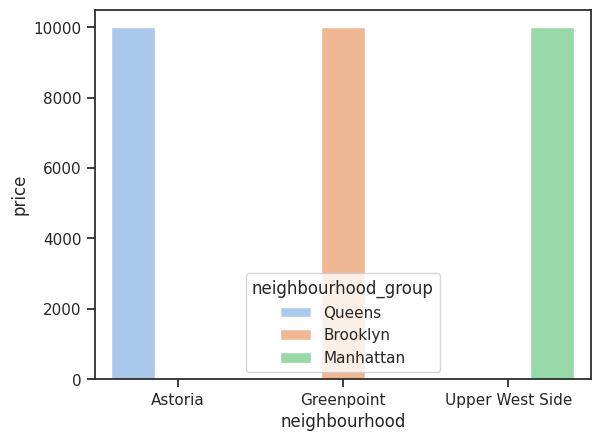

In [57]:
dfc2 = df.copy()
dfc2 = dfc2[dfc2['price'] == 10000]
sns.barplot(dfc2, x='neighbourhood', y='price', hue='neighbourhood_group')

<Axes: xlabel='neighbourhood', ylabel='price'>

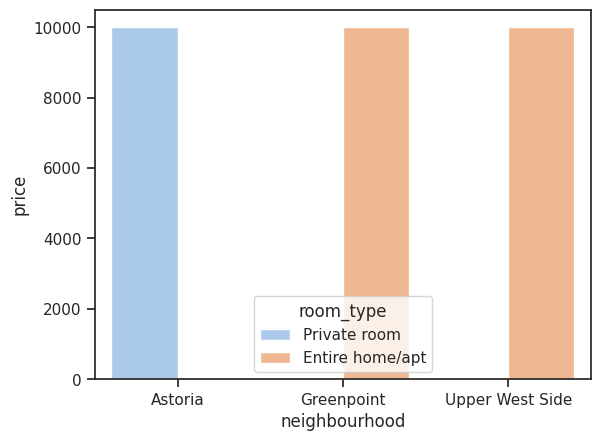

In [58]:
sns.barplot(dfc2, x='neighbourhood', y='price', hue='room_type')

In [62]:
dfc2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83


### Key points

- Listing located in Manhattan are pricier than others. (above 150$)
- Some pricier(than others) listings are scattered around Queens as well.
- Host name that has most listings have listings in Brooklyn, Manhattan and few around other boroghs as well.
- Most expensive and favorite room type is Entire home/apt and least is shared room.
- there are about 1763 listings above 400\$ in price in dataset. Entire home/apt - 1535, Private room - 216, Shared room - 12
- There are 3 listings priced at 10000\$ they are in Astoria, Greenpoint and Upper West Side areas. 2 of them are entire home/apt 1 of them is private room. 2 of them have reviews.

After removing outliers in price column

- No listings for Shared rooms in Bronx. Staten Island have only 14.


## What boroghs or neighbourhoods are most busy?


We'll use reviews per month to determine how busy the listing is.


<Axes: xlabel='longitude', ylabel='latitude'>

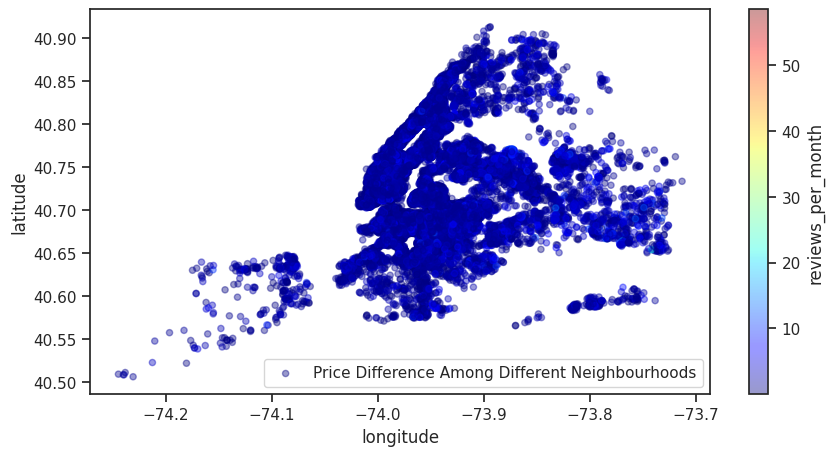

In [65]:
dfc3 = df.copy()

dfc3.plot(kind='scatter', x='longitude', y='latitude', label='Price Difference Among Different Neighbourhoods', c='reviews_per_month',
          cmap='jet', colorbar=True, alpha=0.4, figsize=(10, 5))

<Axes: xlabel='neighbourhood_group', ylabel='reviews_per_month'>

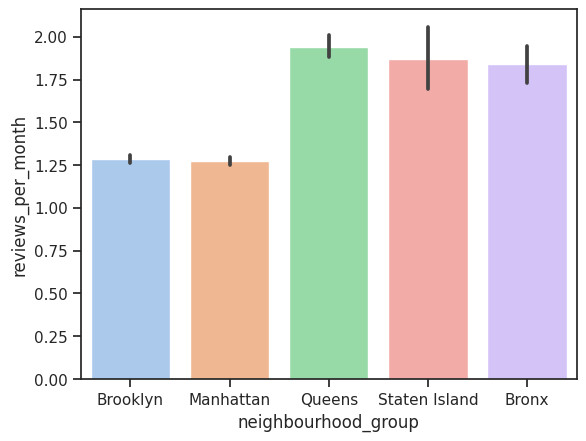

In [67]:
sns.barplot(data=dfc3, x='neighbourhood_group', y='reviews_per_month')

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='neighbourhood_group', ylabel='reviews_per_month'>

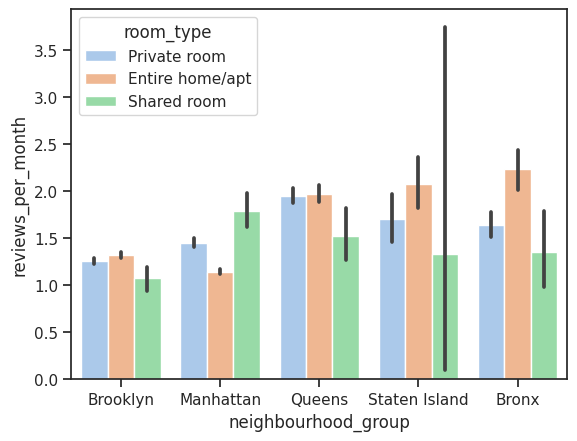

In [68]:
sns.barplot(data=dfc3, x='neighbourhood_group',
            y='reviews_per_month', hue='room_type')

In [70]:
busiest_listing = dfc3[dfc3['reviews_per_month']
                       == dfc3['reviews_per_month'].max()]
busiest_listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.5,9,299


In [73]:
least_busiest_listings = dfc3[dfc3['reviews_per_month']
                              == dfc3['reviews_per_month'].min()]
print(least_busiest_listings.shape)
least_busiest_listings.head()

(42, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1
229,59121,"Nice, clean, safe, convenient 3BR",204539,Mark,Queens,Ridgewood,40.70411,-73.89934,Entire home/apt,140,14,1,2012-09-17,0.01,5,365
317,74860,"Sunlit and Cozy Williamsburg/Greenpoint, Brooklyn",394752,Allison,Brooklyn,Greenpoint,40.72488,-73.95018,Private room,55,2,1,2011-03-28,0.01,1,0
355,98330,LOVELY APARTMENT IN THE HEART OF NY,31374,Shon,Manhattan,Kips Bay,40.73877,-73.97707,Entire home/apt,125,4,1,2012-01-03,0.01,3,181
608,229874,Oversized Studio in Park Slope,507304,Derrick,Brooklyn,Sunset Park,40.66293,-73.99833,Entire home/apt,200,5,1,2012-01-02,0.01,1,0


In [74]:
least_busiest_listings['neighbourhood_group'].value_counts()

Brooklyn     19
Manhattan    19
Queens        4
Name: neighbourhood_group, dtype: int64

In [75]:
least_busiest_listings['room_type'].value_counts()

Entire home/apt    28
Private room       14
Name: room_type, dtype: int64

### Key points

- Queens is the busiest according to reviews per month, Manhattan is the least busy. So Manhattan is pricier but less busy.
- Entire home/apt s in Bronx are the most busiest and shared rooms in Brooklyn are the least busy.
- busiest listing's host is Row NYC. Listing is in Manhattan, Theater Ditrict. It's a private room. price is close to average(of price distribution), have 156 reviews and average of 58.5 reviews per month. That's 702 reviews per year. Listing's is available for 299 days around the year.
- There are 42 listings with 0.01 average reviews per month. That is about 1 review per year. These are the least busiest. Brooklyn - 19, Manhattan - 19, Queens - 4.
- Among them 28 listings are Entire home/apt and 14 are private rooms.


## Price distribution


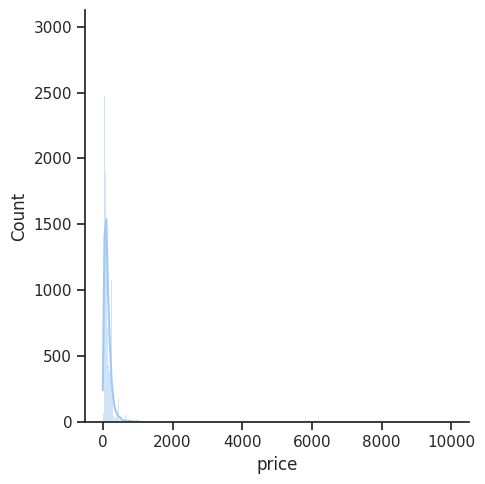

In [78]:
sns.displot(df, x='price', kde=True)

<Axes: xlabel='price'>

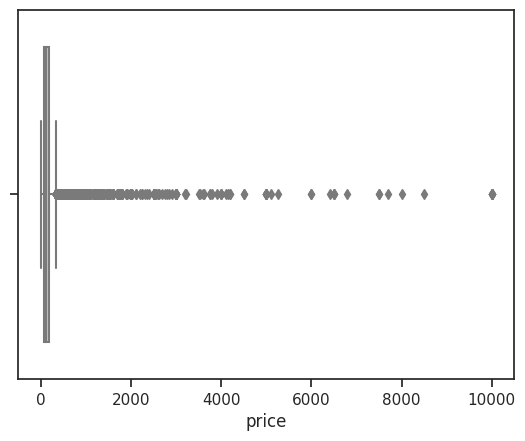

In [79]:
sns.boxplot(df, x='price')

In [80]:
print("in price distribution skew is ",
      df['price'].skew(), ". kurtosis is ", df['price'].kurtosis())

in price distribution skew is  19.118938995046033 . kurtosis is  585.6728788988286


in price distribution skew is 19.118938995046033 . kurtosis is 585.6728788988286

skew and kurtosis is very high. high skew mean data is not evenly distributed. high kurtosis means there's lot of outliers.

If we look closely we can see average rental price is 152$ but there are some unusual prices like 10000. This may be caused by wrong entry data, data processing errors, and natural variances.

\*wrong entry data is very straightforward. this means error in entering data.

\*data processing errors can happen in the process of data modeling and manipulation after collecting data.

\*natural variances are the anormalies in real world situations. as a example if we are analyzing exam marks data in a class/school some students may get high marks wheather the exam is hard or easy. They are anormalies.

We can trim, cap, or use other methods or in cases like fraud detection these outliers are used to detect fraud.


I'm using IQR method to remove outliers in dataset.


In [81]:
dfc = df.copy()
price_skew_before = dfc['price'].skew()
price_kurtosis_before = dfc['price'].kurtosis()

# make a copy of dataset
new_df = dfc.copy()

p25 = new_df['price'].quantile(0.25)
p75 = new_df['price'].quantile(0.75)
iqr = p75 - p25

# limits
price_lower_limit = p25 - 1.5 * iqr
price_upper_limit = p75 + 1.5 * iqr

# price lower limit is a negative value. we will set it to 0
price_lower_limit = 0
print(price_upper_limit)
print(price_lower_limit)

# get trimmed dataset
new_df = new_df[new_df['price'] > price_upper_limit]
new_df.shape

334.0
0


(2972, 16)

there are 2972 outliers. We can cap or remove them. Since we have a significatly large dataset I will remove these data points.


In [82]:
new_df = df[df['price'] < price_upper_limit]
new_df.shape

(45918, 16)

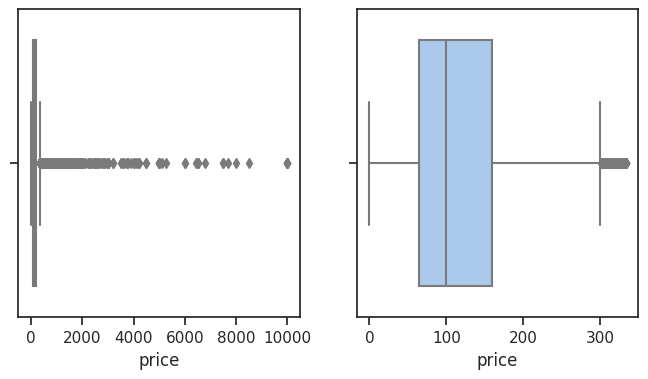

In [83]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.boxplot(df, x='price')
plt.subplot(1, 2, 2)
sns.boxplot(new_df, x='price')
plt.show()

In [84]:
print("before skew is ", df['price'].skew(
), "after cleaning outliers skew is ", new_df['price'].skew())
print("before kurtosis is ", df['price'].kurtosis(
), "after cleaning outliers kurtosis is ", new_df['price'].kurtosis())

before skew is  19.118938995046033 after cleaning outliers skew is  0.9229248016381388
before kurtosis is  585.6728788988286 after cleaning outliers kurtosis is  0.16954327553330284


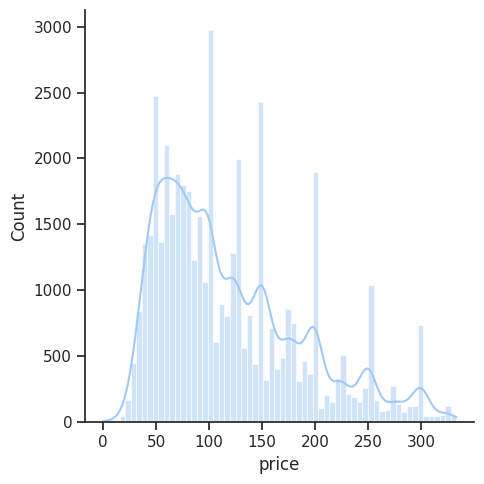

In [86]:
sns.displot(new_df, x='price', kde=True)

### Key points

- Price distribution is highly skewed and kurtosis very high. Needs cleaning.
- removed outliers using IQR method.


## What key factors drive price the most


<Axes: xlabel='room_type', ylabel='price'>

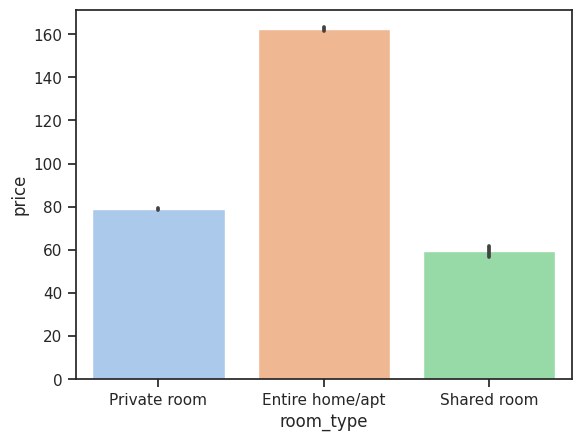

In [88]:
sns.barplot(new_df, x='room_type', y='price')

<Axes: xlabel='number_of_reviews', ylabel='price'>

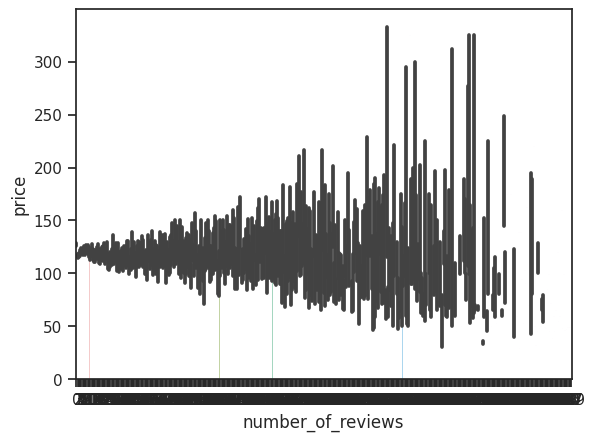

In [102]:
sns.barplot(new_df, x='number_of_reviews', y='price')

<Axes: xlabel='reviews_per_month', ylabel='price'>

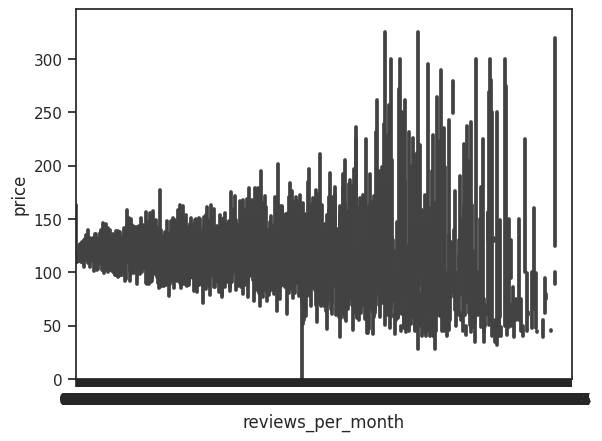

In [103]:
sns.barplot(new_df, x='reviews_per_month', y='price')

<Axes: xlabel='availability_365', ylabel='price'>

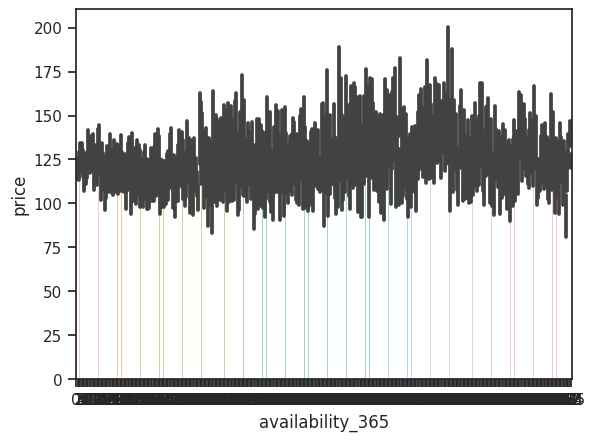

In [104]:
sns.barplot(new_df, x='availability_365', y='price')

### Key points

- We can see correlation between location and room type with the price. The other parameter doesn't show linear corrleation pattern with price.
- Only parameters that affect the price within a pattern is room_type, neighbourhood/location.


## Predictive model

What can we predict? Do we have enough data to build a predictive model.

I have tried mulitple linear regression models to make a ml model that can predict the price of a listing with other parameters. But none of them were efficient. You can see the preprocessing and model fitting in 'airbnb_nyc_data_analyze_and_model_v2.ipynb' notebook. If you are seeing this in github repo there will be another notebook with that name. You can check that out.

The reason we can't build a effient ml model is because we don't have enough data. Only corelation that we have with price is the location and room type. That is not enough. Let's say there are 2 listings in same neighourhood, both are private rooms but prices are significantly different. Why? because one is larger, more cozy, have free wifi, free breakfast, etc like other benefits that will drive it's price comparing to other property that doesn't have those benefits.

We need more data/features/parameters to build a effient predictive model.


## Conclusion

Price is mostly affected by location and room types. But still that's not enough to build a linear regression model. Dataset is good for EDA purpose but not enough parameters for a predictive model.
